In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
dataFrame = pd.read_excel("merc.xlsx")

In [3]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [4]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

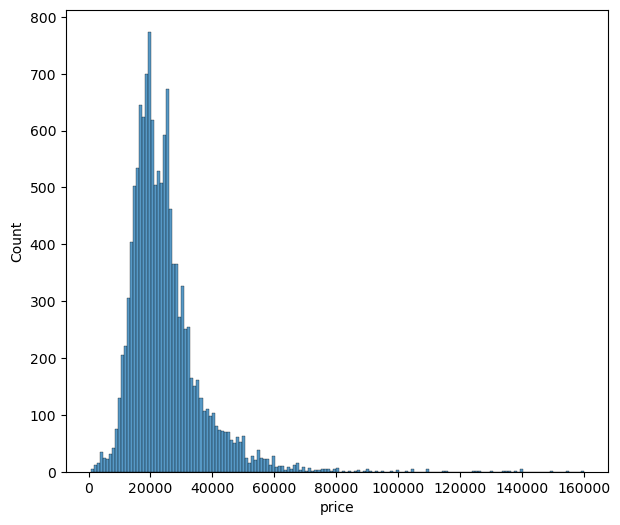

In [6]:
plt.figure(figsize=(7,6))
sbn.histplot(dataFrame["price"])

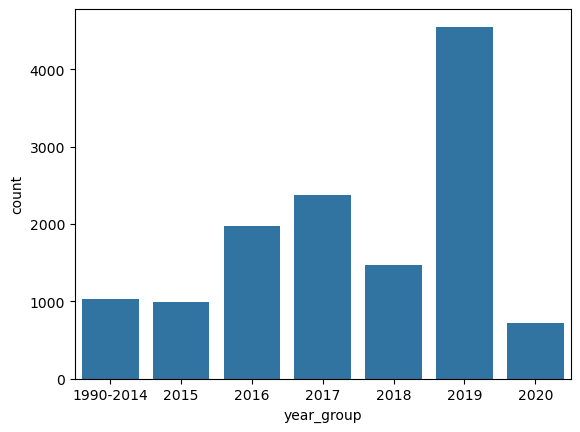

In [7]:
dataFrame["year_group"] = pd.cut(dataFrame["year"], bins=[1990,2014,2015,2016,2017,2018,2019,2020],
                                  labels=["1990-2014","2015","2016","2017","2018","2019","2020"])
sbn.countplot(x="year_group", data=dataFrame)
plt.show()

In [8]:
dataFrame_numeric = dataFrame.select_dtypes(include=["number"])
dataFrame_numeric.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [9]:
dataFrame.corr(numeric_only=True)

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [10]:
dataFrame_numeric.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<Axes: xlabel='mileage', ylabel='price'>

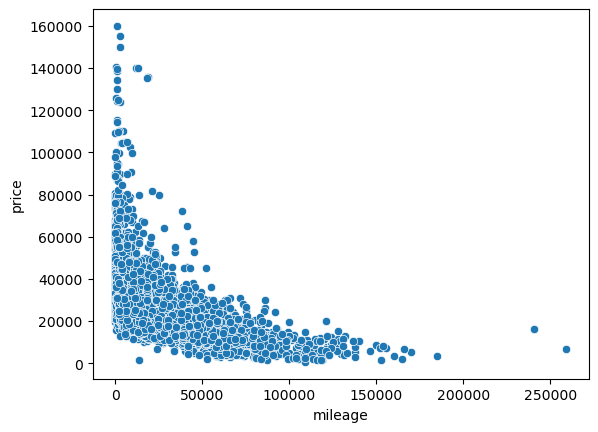

In [11]:
sbn.scatterplot(x="mileage",y="price",data=dataFrame)

In [12]:
dataFrame.sort_values("price",ascending=False).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize,year_group
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0,2020
10044,2020,154998,Automatic,3000,150,21.4,4.0,2020
5,2011,149948,Automatic,3000,570,21.4,6.2,1990-2014
8737,2019,140319,Semi-Auto,785,150,22.1,4.0,2019
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0,2018
8,2019,139948,Automatic,12000,145,21.4,4.0,2019
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0,2019
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0,2020
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0,2018
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0,2018


In [13]:
len(dataFrame)*0.01

131.19

In [14]:
ninetyNinePercentDf = dataFrame.sort_values("price",ascending=False).iloc[131:]

In [15]:
ninetyNinePercentDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


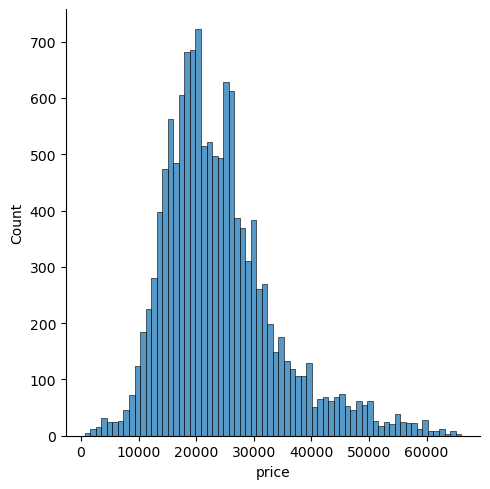

In [16]:
sbn.displot(ninetyNinePercentDf["price"])

In [17]:
dataFrame_numeric.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [18]:
ninetyNinePercentDf.groupby("year")["price"].mean()

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [19]:
dataFrame[dataFrame.year!=1970].groupby("year")["price"].mean()

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [20]:
dataFrame= ninetyNinePercentDf.select_dtypes(include=["number"])

In [21]:
dataFrame = dataFrame[dataFrame.year != 1970]

In [22]:
dataFrame.groupby("year")["price"].mean()

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [23]:
dataFrame

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


In [24]:
y = dataFrame["price"].values
x= dataFrame.drop("price",axis=1).values

In [25]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [26]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=10)

In [29]:
len(x_train)

9090

In [30]:
len(x_test)

3897

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
x_train = scaler.fit_transform(x_train)

In [34]:
x_test = scaler.transform(x_test)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
x_train.shape

(9090, 5)

In [37]:
model = Sequential()

model.add(Dense(13,activation="relu"))
model.add(Dense(13,activation="relu"))
model.add(Dense(13,activation="relu"))
model.add(Dense(13,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [38]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=200,epochs=250)

Epoch 1/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 674486976.0000 - val_loss: 688076160.0000
Epoch 2/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 665924288.0000 - val_loss: 687862208.0000
Epoch 3/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 671164160.0000 - val_loss: 686801600.0000
Epoch 4/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 663394752.0000 - val_loss: 682727616.0000
Epoch 5/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 665527616.0000 - val_loss: 670883008.0000
Epoch 6/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 645545344.0000 - val_loss: 643065600.0000
Epoch 7/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 616020032.0000 - val_loss: 588407680.0000
Epoch 8/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 549689728.0000 - val_loss: 496053472.0000
Epoch 9/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 449167168.0000 - val_loss: 364227808.0000
Epoch 10/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 317851968.0000 - val_loss: 2228

In [39]:
lossData = pd.DataFrame(model.history.history)

In [40]:
lossData

,loss,val_loss
0,672134464.0,688076160.0
1,672038144.0,687862208.0
2,671524096.0,686801600.0
3,669303296.0,682727616.0
4,662106368.0,670883008.0
...,...,...
245,18619824.0,20142644.0
246,18621864.0,20173854.0
247,18593556.0,20178952.0
248,18583888.0,20111816.0


<Axes: >

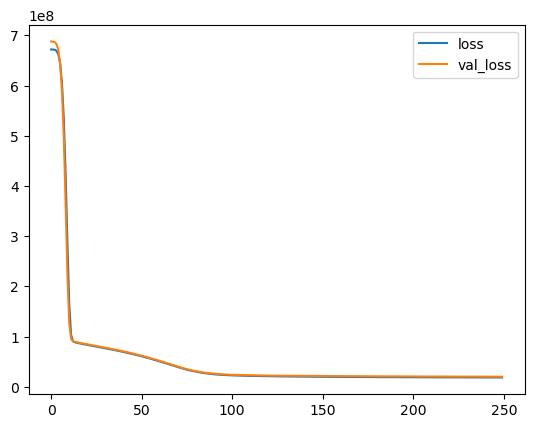

In [41]:
lossData.plot()

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [43]:
predictArray = model.predict(x_test)

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [44]:
predictArray

array([[21859.922],
       [22261.223],
       [24038.52 ],
       ...,
       [25723.36 ],
       [15561.369],
       [23977.861]], dtype=float32)

In [45]:
mean_absolute_error(y_test,predictArray)

3193.926374208814

In [46]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


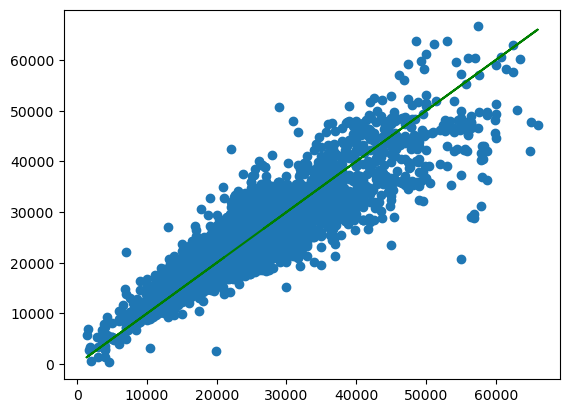

In [47]:
plt.scatter(y_test,predictArray)
plt.plot(y_test,y_test,"g")

In [48]:
dataFrame.iloc[3]

year           2019.0
price         65000.0
mileage        3398.0
tax             145.0
mpg              27.2
engineSize        4.0
Name: 4727, dtype: float64

In [49]:
newCarSeries = dataFrame.drop("price",axis=1).iloc[3]

In [50]:
newCarSeries = scaler.transform(newCarSeries.values.reshape(-1,5))

In [51]:
model.predict(newCarSeries)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[59316.145]], dtype=float32)